In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 영은언니가 데이터 전처리수정완료한 것 불러오기
data = pd.read_excel('전처리수정.xlsx')
print(data.shape)
data.head()

(2194, 44)


,Unnamed: 0,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
0,0,5524,2,58138,0,0,58,635,88,546,...,1,0,0,0,0,0,1,0,0,0
1,1,2174,2,46344,1,1,38,11,1,6,...,0,1,0,0,0,0,0,1,0,0
2,2,4141,2,71613,0,0,26,426,49,127,...,0,1,0,0,0,1,0,0,0,0
3,3,6182,2,26646,1,0,26,11,4,20,...,0,0,1,0,1,0,0,0,0,0
4,4,5324,4,58293,1,0,94,173,43,118,...,0,0,0,0,0,0,0,1,0,0


### income으로 군집화 cluster수는 3

In [3]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 42)

# 정규화된 데이터에 학습
model.fit(data)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
data['cluster'] = model.fit_predict(data)
data.head()

,Unnamed: 0,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화,cluster
0,0,5524,2,58138,0,0,58,635,88,546,...,0,0,0,0,0,1,0,0,0,2
1,1,2174,2,46344,1,1,38,11,1,6,...,1,0,0,0,0,0,1,0,0,2
2,2,4141,2,71613,0,0,26,426,49,127,...,1,0,0,0,1,0,0,0,0,0
3,3,6182,2,26646,1,0,26,11,4,20,...,0,1,0,1,0,0,0,0,0,1
4,4,5324,4,58293,1,0,94,173,43,118,...,0,0,0,0,0,0,1,0,0,2


## income으로 클러스터가 된 것을 확인
- 군집수 4가 아니라 3으로 한 이유는 4로 돌렸을 때 income이 경계가 애매하게 잘렸음을 확인했기 때문

<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='Income'>

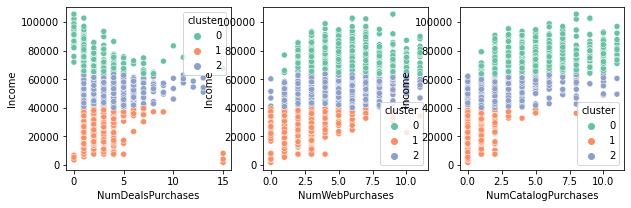

In [5]:
plt.figure(figsize=(10, 3))
plt.subplot(131)
sns.scatterplot(x='NumDealsPurchases', y='Income', data=data, hue=data['cluster'], palette='Set2')

plt.subplot(132)
sns.scatterplot(x='NumWebPurchases', y='Income', data=data, hue=data['cluster'], palette='Set2')

plt.subplot(133)
sns.scatterplot(x='NumCatalogPurchases', y='Income', data=data, hue=data['cluster'], palette='Set2')

## income으로 cluster 0,1,2로 나누고 해당 데이터셋생성
- data0=> income 63000~150000(상위권)
- data1=> income 0~40000(하위권)
- data2=> income 40000~62000(중위권)
- 모든 데이터에서 income 삭제

In [13]:
data0 = data[data['cluster'] == 0] 
data1 = data[data['cluster'] == 1] 
data2 = data[data['cluster'] == 2] 
data0 = data0.drop(['Income','Unnamed: 0'] ,axis=1) 
data1 = data1.drop(['Income','Unnamed: 0'] ,axis=1) 
data2 = data2.drop(['Income','Unnamed: 0'] ,axis=1)  

In [14]:
data0.head()

,ID,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화,cluster
2,4141,2,0,0,26,426,49,127,111,21,...,1,0,0,0,1,0,0,0,0,0
14,2114,4,0,0,23,1006,22,115,59,68,...,0,1,0,0,0,0,0,1,0,0
17,6565,3,0,1,91,1012,80,498,0,16,...,0,0,0,1,0,0,0,0,0,0
21,4047,4,0,1,0,384,0,102,21,32,...,0,1,0,0,0,0,0,1,0,0
26,1966,4,0,0,96,684,100,801,21,66,...,0,1,1,0,0,0,0,0,0,0


In [82]:
data1.head()

,ID,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,total_amount,total_kids,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,month_1분기,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화,cluster
3,6182,2,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,53,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
7,6177,4,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,37,169,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
8,4855,4,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,48,46,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
9,5899,4,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,72,49,2,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
10,387,1,0,0,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0,46,61,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1


In [83]:
data2.head()

,ID,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,total_amount,total_kids,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,month_1분기,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화,cluster
0,5524,2,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,1617,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,2
1,2174,2,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,27,2,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,2
4,5324,4,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,422,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2
5,7446,3,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,55,716,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2
6,965,2,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,51,590,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2


In [8]:
# data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *

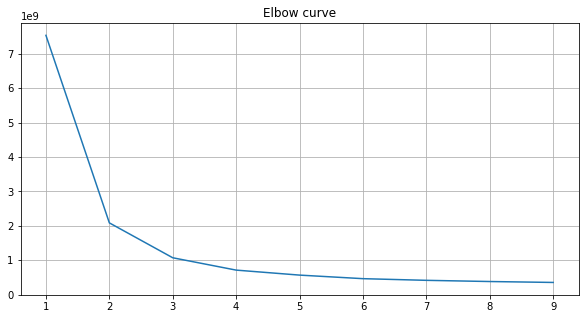

In [15]:
#data0
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data0)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

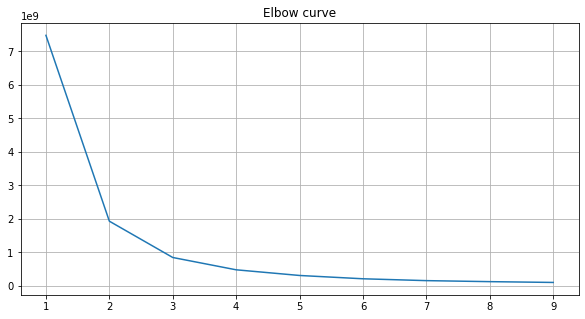

In [16]:
#data1
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data1)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

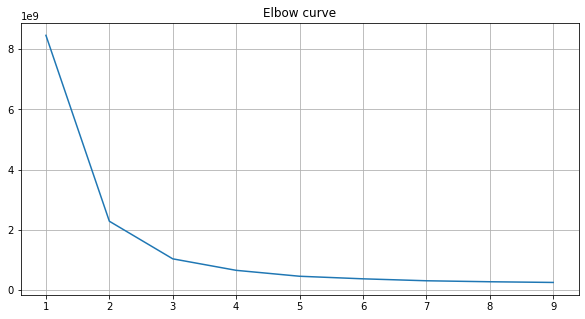

In [17]:
#data2
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data2)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

- 대부분 클러스터가 2~3으로 나옴.

# data0(상위권)

<function matplotlib.pyplot.show(close=None, block=None)>

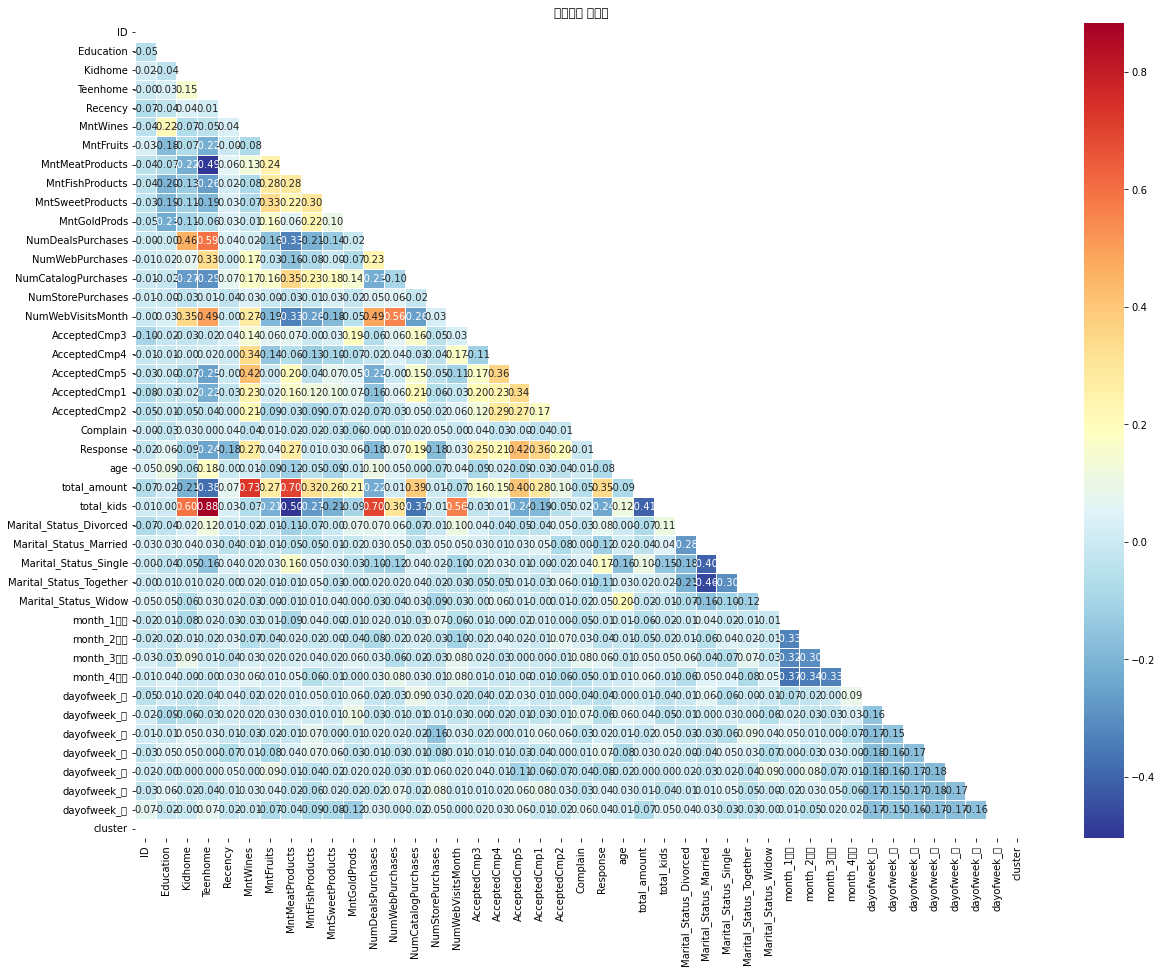

In [18]:
corr = data0.corr()
plt.figure(figsize = (20,15))
mask= np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr,
           annot= True,
           mask=mask,
           fmt = '.2f',
           linewidths=1,
           cmap = 'RdYlBu_r')
plt.title('상관계수 히트맵')
plt.show

### response,age,education,total_amount,total_kids,recency,상품종류들 6개,구입경로5개,AcceptedCmp 5개
- 총 22개


In [65]:
data0_1 = data0[['Education','Response','Recency','total_kids','total_amount','age',
                 'MntWines','MntFruits','MntMeatProducts','MntFishProducts',
                 'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',
                 'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
                 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
                 'AcceptedCmp5']]
data0_1.head()

,Education,Response,Recency,total_kids,total_amount,age,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
2,2,0,26,0,776,57,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0
14,4,1,23,0,1315,76,1006,22,115,59,68,45,1,7,6,12,3,1,0,0,0,1
17,3,0,91,1,1782,73,1012,80,498,0,16,176,2,11,4,9,5,1,0,0,0,0
21,4,0,0,1,544,68,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0
26,4,0,96,0,1672,57,684,100,801,21,66,0,1,6,9,10,2,0,0,0,0,1


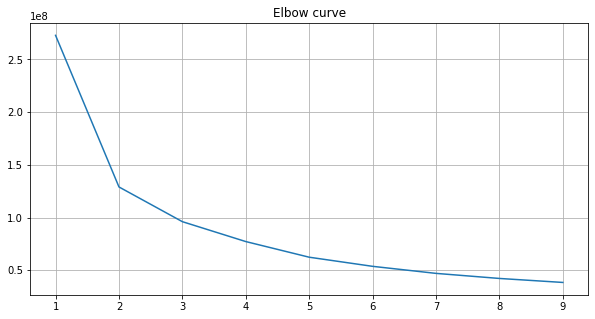

In [66]:
#data0_1
#혹시나하고 다시 돌려봤는데 역시 2~3인듯
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data0_1)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [67]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agg_clustering.fit_predict(data0_1)

### 3그룹으로 나눈뒤 top 3 상관계수의 관계 시각화

<AxesSubplot:xlabel='total_kids', ylabel='NumDealsPurchases'>

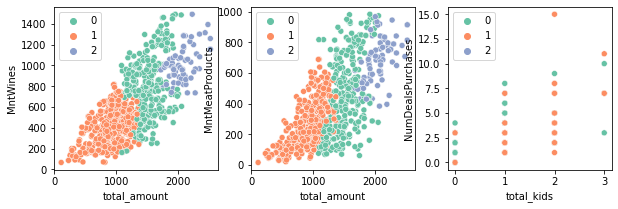

In [68]:
plt.figure(figsize=(10, 3))
plt.subplot(131)
sns.scatterplot(x='total_amount', y='MntWines', data=data0_1, hue=labels, palette='Set2')

plt.subplot(132)
sns.scatterplot(x='total_amount', y='MntMeatProducts', data=data0_1, hue=labels, palette='Set2')

plt.subplot(133)
sns.scatterplot(x='total_kids', y='NumDealsPurchases', data=data0_1, hue=labels, palette='Set2')

## 수치들 비교

In [69]:
pd.set_option('display.max_columns', None)

In [70]:
k_means_fit = KMeans(n_clusters=3, max_iter=300)
k_means_fit.fit(data0_1)
data0_1_cluster = k_means_fit.cluster_centers_
data0_1_cluster= pd.DataFrame(data0_1_cluster, columns = data0_1.columns)
data0_1_cluster

,Education,Response,Recency,total_kids,total_amount,age,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,2.631399,0.215017,48.945392,0.378840,1308.310580,54.436860,607.078498,60.341297,409.296928,90.368601,66.491468,74.733788,1.662116,5.508532,5.781570,8.645051,3.160410,0.129693,0.017065,0.064846,0.088737,0.156997
1,2.673820,0.081545,47.725322,0.763948,779.463519,55.575107,358.390558,44.763948,211.055794,59.360515,44.776824,61.115880,1.939914,5.506438,4.154506,8.532189,3.420601,0.094421,0.008584,0.025751,0.103004,0.060086
2,2.843243,0.459459,51.162162,0.254054,1863.854054,53.632432,987.800000,65.567568,573.291892,94.508108,66.005405,76.681081,1.318919,5.497297,6.064865,8.286486,3.410811,0.362162,0.064865,0.135135,0.254054,0.524324


- response/total_kids/total_amount/MntWines/MntFishProducts/MntGoldProds/NumCatalogPurchases/AcceptedCmp5 차이 유의미한 듯

# data1(하위권)

<function matplotlib.pyplot.show(close=None, block=None)>

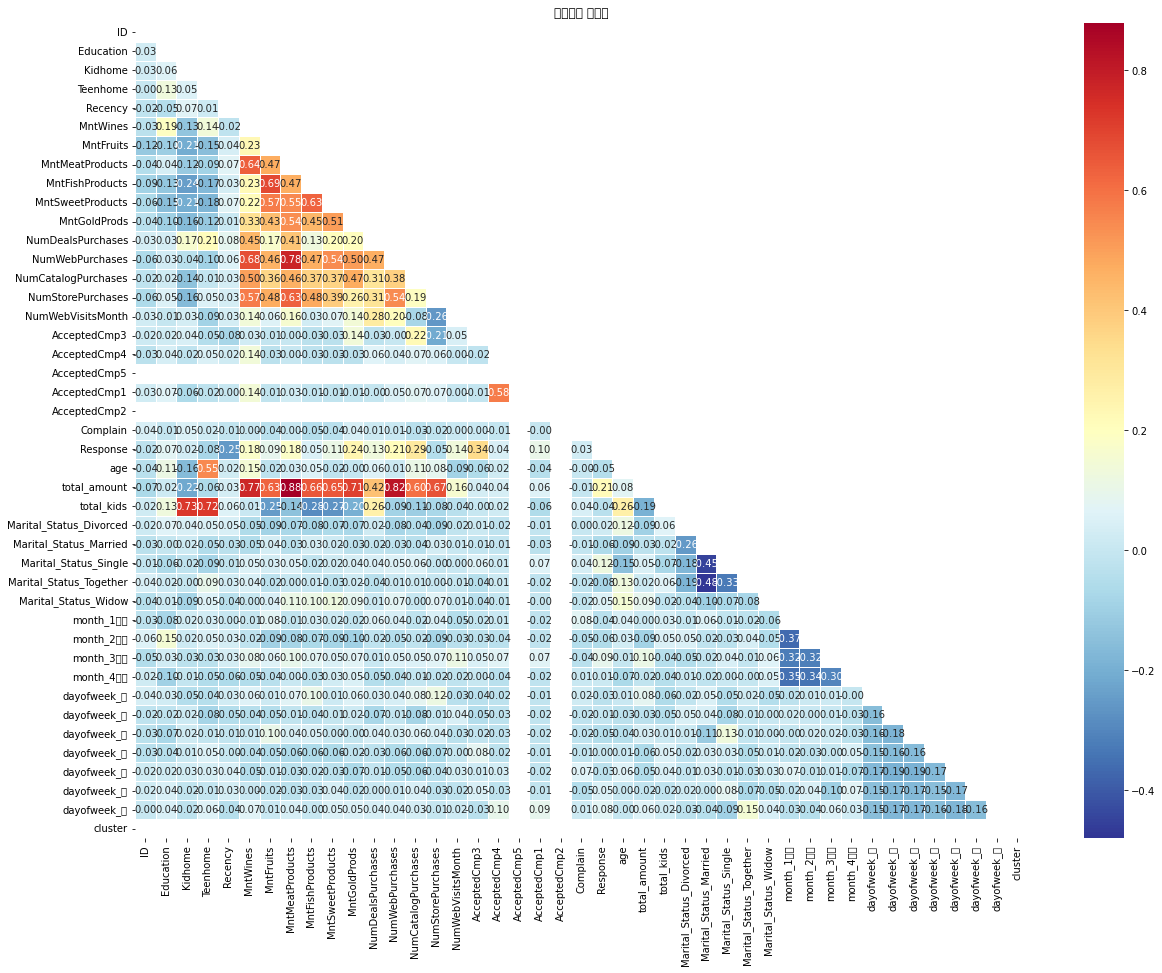

In [33]:
corr = data1.corr()
plt.figure(figsize = (20,15))
mask= np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr,
           annot= True,
           mask=mask,
           fmt = '.2f',
           linewidths=1,
           cmap = 'RdYlBu_r')
plt.title('상관계수 히트맵')
plt.show

### response,age,education,total_amount,total_kids,recency,상품종류들 6개,구입경로5개,AcceptedCmp 5개
- 총 22개

In [71]:
data1_1 = data1[['Education','Response','Recency','total_kids','total_amount','age',
                 'MntWines','MntFruits','MntMeatProducts','MntFishProducts',
                 'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',
                 'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
                 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
                 'AcceptedCmp5']]
data1_1.head()

,Education,Response,Recency,total_kids,total_amount,age,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
3,2,0,26,1,53,38,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0
7,4,0,32,1,169,37,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0
8,4,1,19,1,46,48,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0
9,4,0,68,2,49,72,28,0,6,1,1,13,1,1,0,0,20,0,0,1,0,0
10,1,0,59,0,61,46,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0


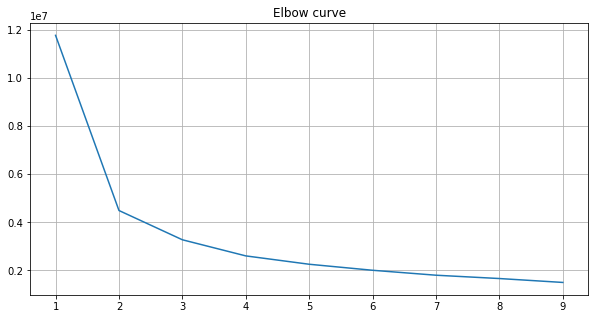

In [72]:
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data1_1)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

### 3그룹으로 나눈뒤 top 3 상관계수의 관계 시각화

In [74]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agg_clustering.fit_predict(data1_1)

<AxesSubplot:xlabel='NumWebPurchases', ylabel='MntMeatProducts'>

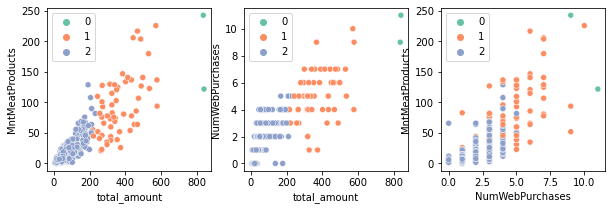

In [75]:
plt.figure(figsize=(10, 3))
plt.subplot(131)
sns.scatterplot(x='total_amount', y='MntMeatProducts', data=data1_1, hue=labels, palette='Set2')

plt.subplot(132)
sns.scatterplot(x='total_amount', y='NumWebPurchases', data=data1_1, hue=labels, palette='Set2')

plt.subplot(133)
sns.scatterplot(x='NumWebPurchases', y='MntMeatProducts', data=data1_1, hue=labels, palette='Set2')

### 수치들비교

In [76]:
k_means_fit = KMeans(n_clusters=3, max_iter=300)
k_means_fit.fit(data1_1)
data1_1_cluster = k_means_fit.cluster_centers_
data1_1_cluster= pd.DataFrame(data1_1_cluster, columns = data1_1.columns)
data1_1_cluster

,Education,Response,Recency,total_kids,total_amount,age,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,2.530612,0.326531,45.897959,0.734694,416.510204,52.918367,138.918367,26.591837,104.693878,48.816327,26.979592,70.510204,3.816327,5.469388,1.897959,5.224490,7.591837,2.168404e-19,0.0,0.122449,0.000000,0.0
1,2.474138,0.094828,48.015517,1.163793,49.665517,48.365517,13.751724,3.781034,12.072414,5.446552,3.882759,10.731034,1.843103,1.625862,0.291379,2.818966,6.765517,-7.372575e-18,0.0,0.084483,0.001724,0.0
2,2.670103,0.134021,52.092784,1.041237,172.938144,49.484536,71.855670,8.371134,47.876289,10.958763,8.113402,25.762887,2.979381,3.154639,0.938144,3.597938,7.680412,1.030928e-02,0.0,0.051546,0.020619,0.0


# data2(중위권)

<function matplotlib.pyplot.show(close=None, block=None)>

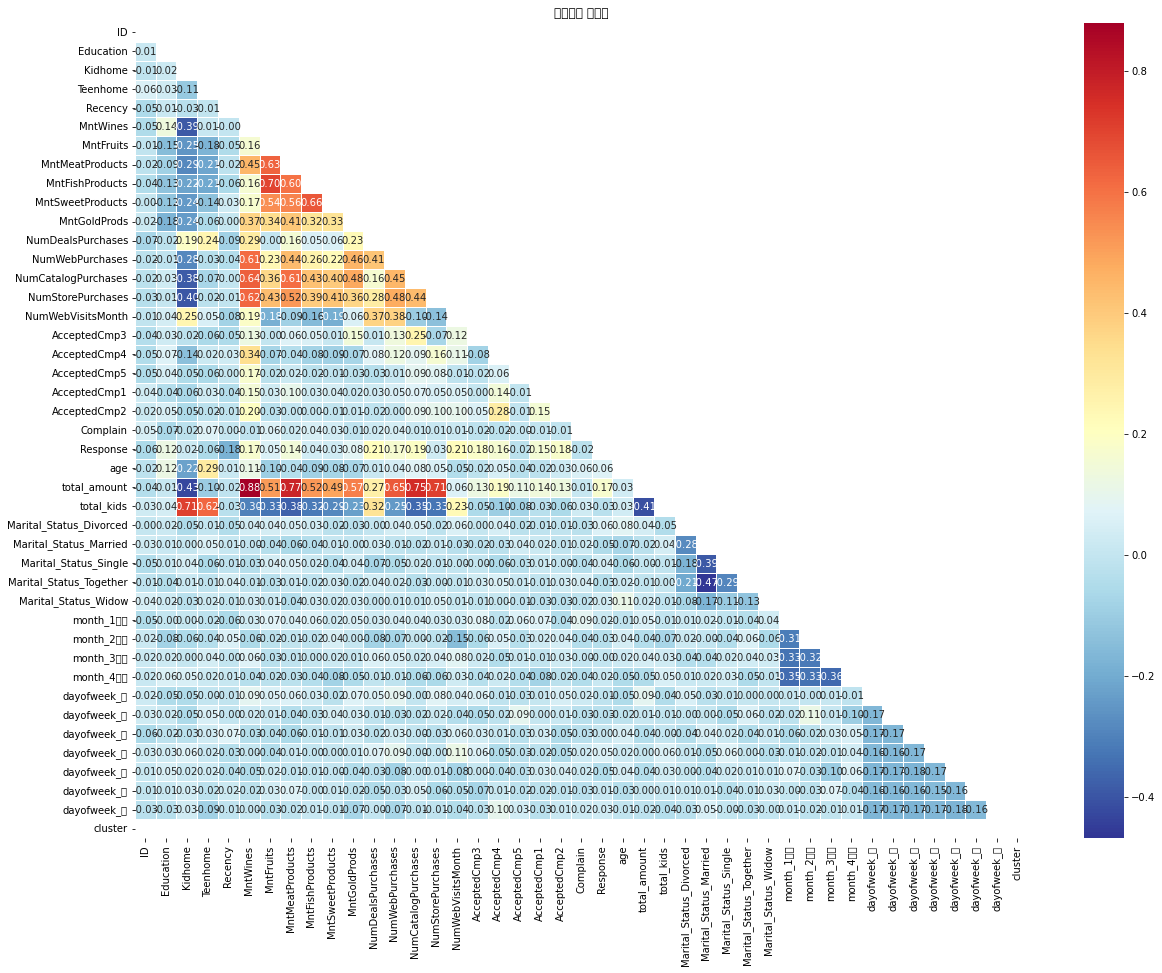

In [77]:
corr = data2.corr()
plt.figure(figsize = (20,15))
mask= np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr,
           annot= True,
           mask=mask,
           fmt = '.2f',
           linewidths=1,
           cmap = 'RdYlBu_r')
plt.title('상관계수 히트맵')
plt.show

### 마찬가지로 22개변수만 남겨두기

In [78]:
data2_1 = data2[['Education','Response','Recency','total_kids','total_amount','age',
                 'MntWines','MntFruits','MntMeatProducts','MntFishProducts',
                 'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',
                 'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
                 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
                 'AcceptedCmp5']]
data2_1.head()

,Education,Response,Recency,total_kids,total_amount,age,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,2,1,58,0,1617,65,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0
1,2,0,38,2,27,68,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0
4,4,0,94,1,422,41,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0
5,3,0,16,1,716,55,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0
6,2,0,34,1,590,51,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0


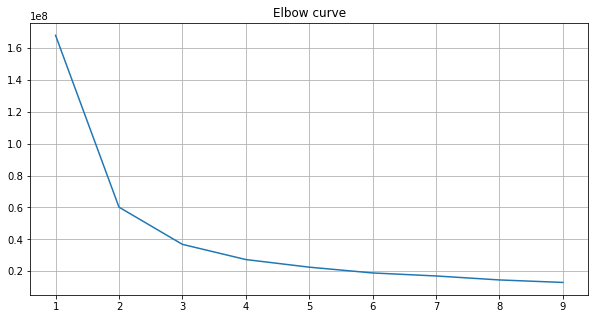

In [79]:
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data2_1)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

### 3그룹으로 나눈뒤 top 3 상관계수의 관계 시각화

In [80]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agg_clustering.fit_predict(data2_1)

<AxesSubplot:xlabel='total_amount', ylabel='NumCatalogPurchases'>

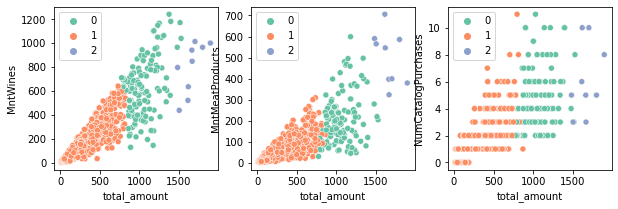

In [81]:
plt.figure(figsize=(10, 3))
plt.subplot(131)
sns.scatterplot(x='total_amount', y='MntWines', data=data2_1, hue=labels, palette='Set2')

plt.subplot(132)
sns.scatterplot(x='total_amount', y='MntMeatProducts', data=data2_1, hue=labels, palette='Set2')

plt.subplot(133)
sns.scatterplot(x='total_amount', y='NumCatalogPurchases', data=data2_1, hue=labels, palette='Set2')

### 수치들비교

In [84]:
k_means_fit = KMeans(n_clusters=3, max_iter=300)
k_means_fit.fit(data2_1)
data2_1_cluster = k_means_fit.cluster_centers_
data2_1_cluster= pd.DataFrame(data2_1_cluster, columns = data2_1.columns)
data2_1_cluster

,Education,Response,Recency,total_kids,total_amount,age,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,2.768802,0.061281,50.830084,1.459610,159.231198,55.440111,85.551532,6.317549,35.114206,8.339833,6.167131,17.740947,2.328691,2.690808,0.869081,3.944290,5.562674,0.002786,0.005571,0.041783,0.036212,-1.301043e-17
1,2.833333,0.187500,50.229167,0.791667,1088.854167,56.951389,662.340278,39.034722,212.097222,55.631944,38.569444,81.180556,3.340278,6.631944,4.687500,8.784722,5.854167,0.048611,0.048611,0.125000,0.180556,2.083333e-02
2,2.740157,0.118110,47.877953,1.161417,557.263780,55.661417,319.350394,21.984252,105.720472,29.094488,20.496063,60.618110,4.043307,6.216535,2.602362,7.196850,5.874016,0.019685,0.007874,0.074803,0.098425,-6.938894e-18
